In [129]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
def b(tau):
    return (3/4)*1*(tau + 2/3)

In [161]:
mu = 0.5773502691896257
deltau = 0.8

mu2 = mu**2
dt2 = deltau**2

a = mu2/dt2
d = 1 + (2*mu2)/dt2
c = mu2/dt2

tau = np.linspace(0,4,6)
evals = np.zeros(6)

d0 = 1 + (mu/deltau) + (deltau/(2*mu))
c0 = mu/deltau

for i in range(len(tau)):
    evals[i] = b(tau[i])

e0 = (evals[0]*deltau)/(2*mu)
e5 = (evals[5]*(0.5 + (mu/deltau)) + evals[4]*(0.5 - (mu/deltau)))
d5 = 0.5 + (mu/deltau)
a5 = (mu/deltau) - 0.5

In [162]:
x = np.array([[d0, -c0, 0, 0, 0, 0], [-a, d, -c, 0, 0, 0], [0, -a, d, -c, 0, 0], [0, 0, -a, d, -c, 0], [0, 0, 0, -a, d, -c], [0, 0, 0, 0, -a5, d5]])

In [163]:
display(np.round(x,2))

array([[ 2.41, -0.72,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.52,  2.04, -0.52,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.52,  2.04, -0.52,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.52,  2.04, -0.52,  0.  ],
       [ 0.  ,  0.  ,  0.  , -0.52,  2.04, -0.52],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.22,  1.22]])

In [164]:
tau

array([0. , 0.8, 1.6, 2.4, 3.2, 4. ])

In [165]:
evals

array([0.5, 1.1, 1.7, 2.3, 2.9, 3.5])

In [166]:
s = np.array([e0, evals[1], evals[2], evals[3], evals[4], e5])

In [167]:
s

array([0.34641016, 1.1       , 1.7       , 2.3       , 2.9       ,
       3.6330127 ])

In [168]:
u = np.linalg.solve(x,s)

In [169]:
u

array([0.46977864, 1.09171051, 1.69772655, 2.29937757, 2.89983351,
       3.49996979])

In [170]:
# plt.plot(tau, u, '--', color = 'red')
# plt.xlabel(r'$\tau$')
# plt.ylabel(r'$u(\tau)$')

In [171]:
upr = np.zeros(6)
for i in range(1, len(tau) -1):
    upr[i] = (u[i+1] - u[i-1])/(2*deltau)

upr[0] = (4*u[1] - 3*u[0] - u[2])/(2*deltau)
upr[-1] = (3*u[-1] + u[-3] - 4*u[-2])/(2*deltau)

In [172]:
upr

array([0.78736223, 0.76746744, 0.75479191, 0.75131685, 0.75037014,
       0.74997056])

In [173]:
upr[0] = (4*u[1] - 3*u[0] - u[2])/(2*deltau)
upr[-1] = (3*u[-1] + u[-3] - 4*u[-2])/(2*deltau)
flux = 4*(mu**2)*upr

Text(0, 0.5, '$F_{mod}/F$')

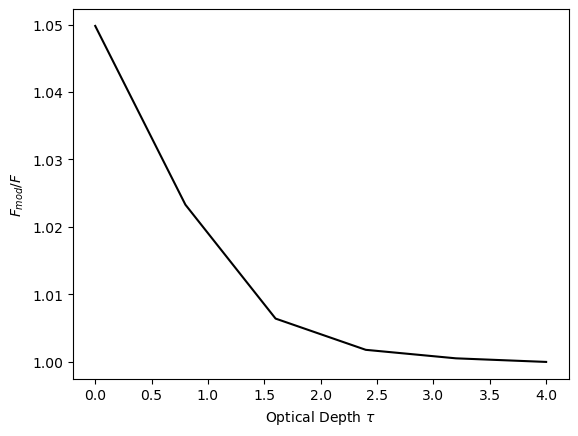

In [174]:
plt.plot(tau, flux, color='k')
plt.xlabel(r'Optical Depth $\tau$')
plt.ylabel(r'$F_{mod}/F$')

In [124]:
N = 6
coeffs = np.array([-a, d, -c])
A = np.zeros((N, N))
svals = np.zeros(N)
tauvals = np.linspace(0,0.5,N)
dtau = tauvals[1] - tauvals[0]
mu = 0.5773502691896257

In [125]:
i = 1
s = 0
while i < N - 1:
    A[i, s:s+3] += coeffs
    svals[i] = b(tauvals[i])
    i += 1
    s += 1

In [126]:
A[0,0] = d0
A[0,1] = -c0
A[-1,-1] = d5
A[-1,-2] = -a5
svals[0] = (b(tau[0])*dtau)/(2*mu)
svals[-1] = (b(tau[-1])*(0.5 + (mu/deltau)) + b(tau[-2])*(0.5 - (mu/deltau)))

In [127]:
np.round(A,2)

array([[ 4.06, -2.89,  0.  ,  0.  ,  0.  ,  0.  ],
       [-8.33, 17.67, -8.33,  0.  ,  0.  ,  0.  ],
       [ 0.  , -8.33, 17.67, -8.33,  0.  ,  0.  ],
       [ 0.  ,  0.  , -8.33, 17.67, -8.33,  0.  ],
       [ 0.  ,  0.  ,  0.  , -8.33, 17.67, -8.33],
       [ 0.  ,  0.  ,  0.  ,  0.  , -2.39,  3.39]])

In [128]:
svals

array([0.04330127, 0.575     , 0.65      , 0.725     , 0.8       ,
       1.6080127 ])